# Прогноз результатов экзаменов учеников

In [3]:
# Цель прогноза результатов экзаменов учеников:

# Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, 
# чтобы на ранней стадии выявлять студентов, находящихся в группе риска в рамках поекта UNICEF — 
# международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру

# Средство составления прогноза:

# Модель, учитывающая собранные статистические данные учеников и примененного к ним анализа данных

## Анализ данных

### Импорт и запуск неодходимых для разведывательного анализа библиотек

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', 100) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

### Импорт статистики, сохраненной в отдельном файле

In [183]:
student_dataset = pd.read_csv('stud_math.xls')

### Функции, используемые для очистки и анализа данных

In [184]:
def median_instead_passes(df_name, column_ind):
    """ Функция по замене незаполненных данных в числовом столбце датафрейма медианными значениями"""
    
    med = df_name[df_name.columns[column_ind]].median()

    df_name[df_name.columns[column_ind]] = df_name[df_name.columns[column_ind]].fillna(med)
    
    return df_name[df_name.columns[column_ind]]


def encode_to_numbers(df_name, column_ind):
    """ Функция кодировки категориальных данных в цифровые и замены пропусков значениями мод"""
    
    df_name[df_name.columns[column_ind]] = df_name[df_name.columns[column_ind]].apply(lambda x: ' ' if pd.isnull(x) else ' ' if x == 'nan' 
                      else x if ',' not in x else x[:x.find(',')].strip())
# устранение лишних запятых и замена пустых значений (NaN) символом пробела 

    labelencoder = LabelEncoder()
    df_name[df_name.columns[column_ind]] = labelencoder.fit_transform(df_name[df_name.columns[column_ind]])
# перекодировка в цифровые значения    
    
    df_name[df_name.columns[column_ind]] = df_name[df_name.columns[column_ind]].astype('float64')
# изменение типа данных в столбце на float64    
    
    mode = max(df_name[df_name.columns[column_ind]].mode())
# вычисление наиболее часто встречаемого значения, отличного от 0


    df_name[df_name.columns[column_ind]] = df_name[df_name.columns[column_ind]].fillna(mode)
    df_name[df_name.columns[column_ind]] = df_name[df_name.columns[column_ind]].replace(0, mode)
# замена нулевых значений модой    
    
    return df_name[df_name.columns[column_ind]]

def get_boxplot(column):
    """ Функция визуализации связи номинативных переменных с показателем score"""
    
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=student_dataset.loc[student_dataset.loc[:, column].isin(student_dataset.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    """ Функция определения статистической разницы в распределении оценок по номинативным признакам (тест Стьюдента)"""
    
    cols = student_dataset.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(student_dataset.loc[student_dataset.loc[:, column] == comb[0], 'score'], 
                        student_dataset.loc[student_dataset.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break            


### Первичный осмотр данных

In [185]:
display(student_dataset.head(10))
student_dataset.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [ ]:
# Набор статистических данных содержит таблицу из 30 столбцов и 395 строк, 
# содержащих 17 столбцов со строковыми данными и 13 - с числовыми, 
# один из которых содержит целочисленные значения

# Только три первых столбца: school, sex и age имеют 100% заполненных значений

In [ ]:
# Все названия столбцов имеют имена удобные для обращения в датафрейм, 
# но один из них (21) требует переименования для дальнейшего удобства использования
# Переименуем его:

In [186]:
student_dataset = student_dataset.rename(columns = {'studytime, granular': 'granular'})
display(student_dataset.columns[20])

'granular'

### Первичный анализ данных в столбцах

#### Столбец school

2


GP    349
MS     46
Name: school, dtype: int64

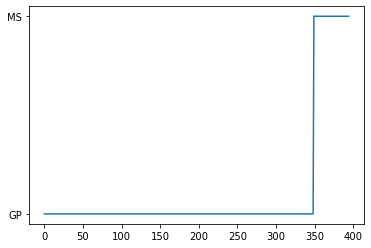

In [187]:
print(student_dataset.school.nunique())
plt.plot(student_dataset.school)
student_dataset.school.value_counts()

In [ ]:
# Данные в столбце имеют всего 2 уникальных значения, соответствующие абревиатуре учебных заведений.
# Причем, большая часть из них (349) имеют значение 'GP', 
# а оставшиеся 46 - 'MS', в дальнейшем может пригодиться в качестве бинарных признаков

#### Столбец sex

In [188]:
display(student_dataset.sex.value_counts())

F    208
M    187
Name: sex, dtype: int64

In [ ]:
# До последующей очистки данных в других столбцах данные о поле учащихся использовать сложно, можно только отметить, 
# что девушек среди учащихся на 6% больше юношей

#### Столбец age

In [189]:
student_dataset['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

<AxesSubplot:>

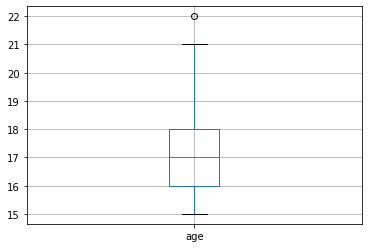

In [190]:
student_dataset.boxplot(['age'])

In [ ]:
# На данном этапе можно отметить, что возраст между 16-18 годами лежит в диапазоне между 1 и 3 квартилями. 
# Выбросы снизу и сверху достигают 15, 22 лет соответственно

### Очистка данных в столбцах

In [ ]:
# Остальные 27 столбцов имеют часть данных незаполненными. 
# Самое большое количество пропусков имеет 6 столбец Pstatus - статус совместного жилья родителей.
# Из 395 строк заполнены 350, т.е. 88%. 

In [191]:
print(student_dataset.nunique())

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           6
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
granular       4
higher         2
internet       2
romantic       2
famrel         6
freetime       5
goout          5
health         5
absences      36
score         18
dtype: int64


In [ ]:
# В столбце Fedu сразу виден выброс, т.к. вместо 5 уникальных значений там их 6. 

In [192]:
student_dataset.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [193]:
# Очевидно, что значение 40 - ложное, вероятнее всего, должно быть значение 4. Заменим его в датасете
student_dataset.Fedu = student_dataset.Fedu.replace(40,4)
student_dataset.Fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

In [ ]:
# В столбцах, имеющих только два уникальных нечисленных значения, заменим их на 0 и 1.
# С пропусками данных можно поступить двояко: заменить пропуски значением 0 или удалить их. 
# Как мы выясниили, в столбце с самым большим количеством пропусков они составляют не более 12%
# При такой большой выборке - это не так много. 
# С другой стороны, если заменить пропуски на 0, мы добавим в данные 12% ложных составлюящих. 
# Удаляем пропуски


#### Обработка данных в столбцах с числовыми переменными

In [ ]:
# Итак, числовые данные у нас представлены в столбцах: 

#  2   age                  395 non-null    int64  
#  6   Medu                 392 non-null    float64
#  7   Fedu                 371 non-null    float64
#  12  traveltime           367 non-null    float64
#  13  studytime            388 non-null    float64
#  14  failures             373 non-null    float64
#  20  studytime, granular  388 non-null    float64
#  24  famrel               368 non-null    float64
#  25  freetime             384 non-null    float64
#  26  goout                387 non-null    float64
#  27  health               380 non-null    float64
#  28  absences             383 non-null    float64
#  29  score                389 non-null    float64

# И только в одном из них (age) нет пропусков

# Используем программу для замены пропусков медианными значениями столбца

In [ ]:
# Вызываем функцию по замене пропусков значений в указанных выше числовых столбцах, начиная с 6-го, медианным значением,  
# определяемым для каждого столбца отдельно

In [194]:
for col in (6, 7, 12, 13, 14, 20, 24, 25, 26, 27, 28, 29):
    student_dataset.iloc[:,[col]] = median_instead_passes(student_dataset, col)

In [ ]:
# Теперь рассмотрим корреляции для числовых столбцов с помощью pairplot из модуля seaborn

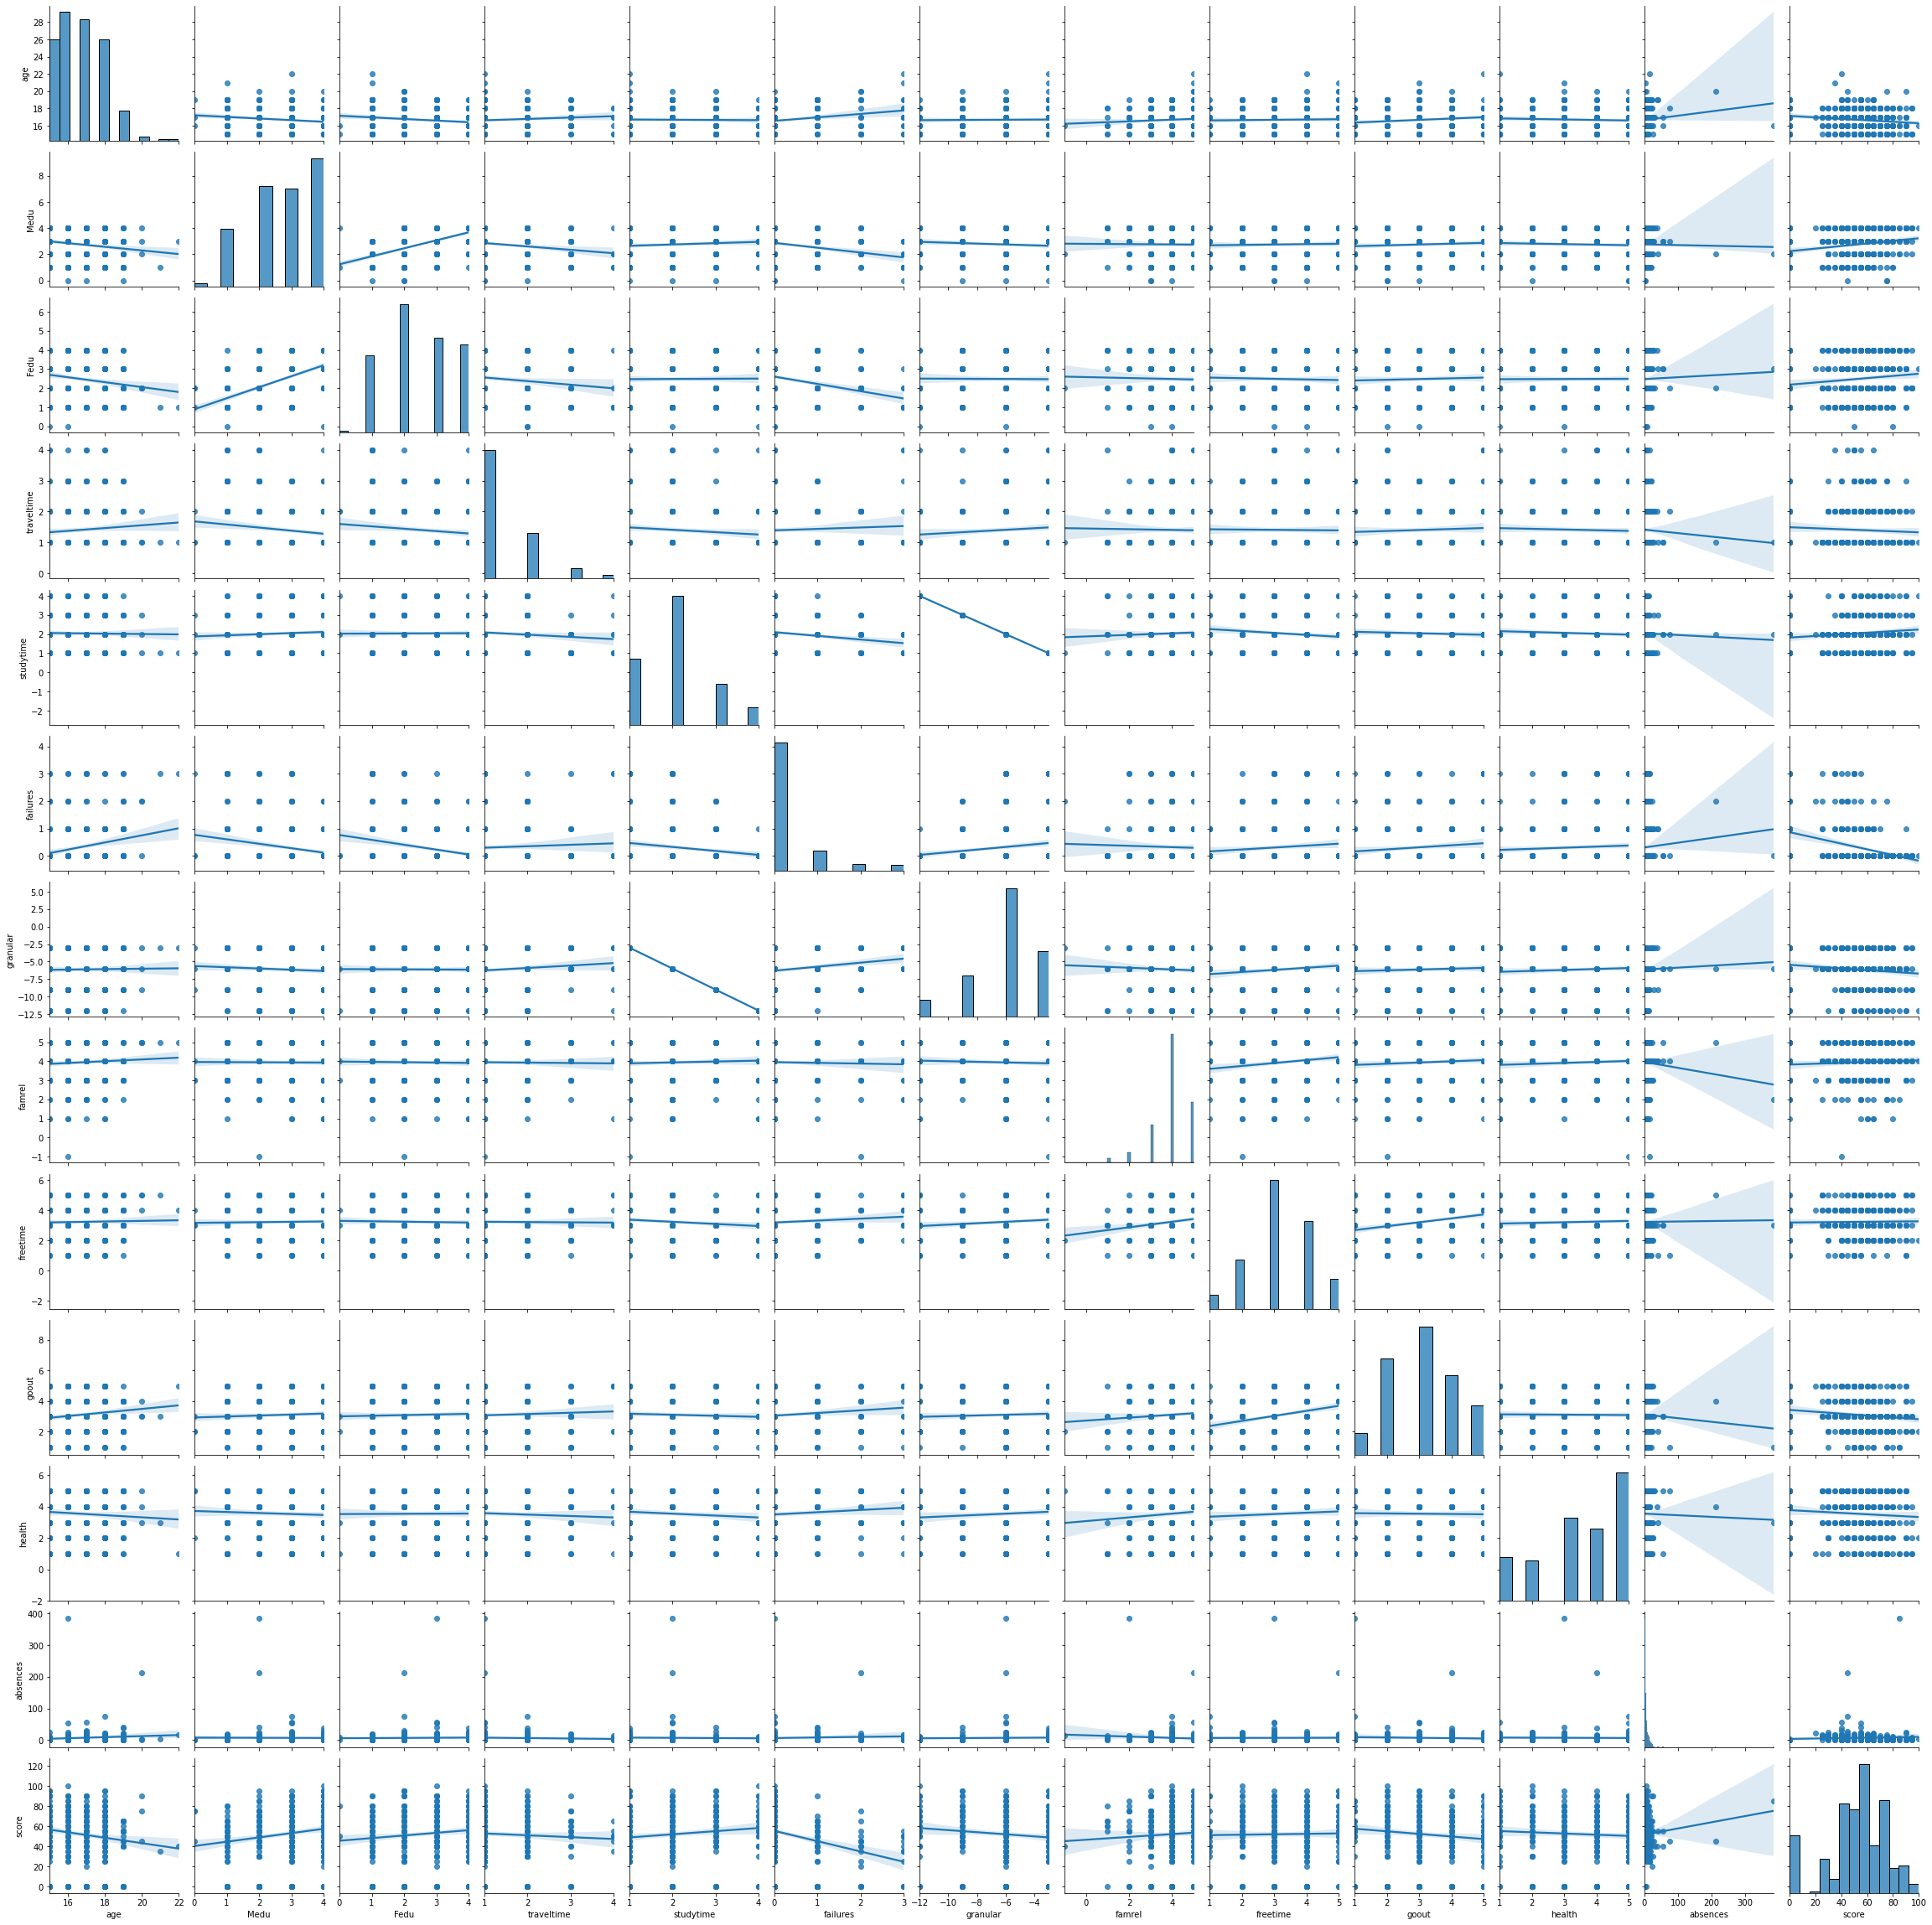

In [195]:
sns.pairplot(student_dataset, kind = 'reg')

In [196]:
# Далее посмотрим, есть ли в датасете столбцы с числовыми значениями, имеющие заметную корреляцию
round(student_dataset.corr(), 2)

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.00,-0.16,-0.15,0.08,-0.02,0.23,0.02,0.07,0.03,0.13,-0.06,0.09,-0.15
Medu,-0.16,1.00,0.59,-0.16,0.08,-0.25,-0.08,-0.01,0.03,0.06,-0.05,-0.01,0.21
Fedu,-0.15,0.59,1.00,-0.12,0.01,-0.26,-0.01,-0.02,-0.03,0.04,0.01,0.02,0.12
traveltime,0.08,-0.16,-0.12,1.00,-0.09,0.05,0.09,-0.02,-0.01,0.05,-0.04,-0.04,-0.06
studytime,-0.02,0.08,0.01,-0.09,1.00,-0.17,-1.00,0.04,-0.12,-0.05,-0.07,-0.03,0.11
failures,0.23,-0.25,-0.26,0.05,-0.17,1.00,0.17,-0.03,0.09,0.11,0.08,0.06,-0.33
granular,0.02,-0.08,-0.01,0.09,-1.00,0.17,1.00,-0.04,0.12,0.05,0.07,0.03,-0.11
famrel,0.07,-0.01,-0.02,-0.02,0.04,-0.03,-0.04,1.00,0.17,0.08,0.08,-0.08,0.06
freetime,0.03,0.03,-0.03,-0.01,-0.12,0.09,0.12,0.17,1.00,0.29,0.06,0.01,0.02
goout,0.13,0.06,0.04,0.05,-0.05,0.11,0.05,0.08,0.29,1.00,-0.01,-0.05,-0.13


In [197]:
# Бросается в глаза, что два столбца с числовыми значениями кореллируют между собой. 
# Имеет место отрицательная корелляция (-1).
# Удалим столбец granular и оставим studytime для модели
student_dataset.drop(['granular'], axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [ ]:
# В итоге показатель score имеет самую низкую корреляцию с показателями: freetime, famrel, traveltime, health и absences. 
# Самая высокая степень корреляции с показателем failures.

#### Обработка данных в столбцах с категориальными переменными

In [ ]:
#  Итак столбцы с категориальными данными у нас следующие:
    
#  0   school               395 non-null    object 
#  1   sex                  395 non-null    object 
#  3   address              378 non-null    object 
#  4   famsize              368 non-null    object 
#  5   Pstatus              350 non-null    object 
#  8   Mjob                 376 non-null    object 
#  9   Fjob                 359 non-null    object 
#  10  reason               378 non-null    object 
#  11  guardian             364 non-null    object 
#  15  schoolsup            386 non-null    object 
#  16  famsup               356 non-null    object 
#  17  paid                 355 non-null    object 
#  18  activities           381 non-null    object 
#  19  nursery              379 non-null    object 
#  21  higher               375 non-null    object 
#  22  internet             361 non-null    object 
#  23  romantic             364 non-null    object 


In [ ]:
# Преобразуем эти данные в числовые и заполним пробелы модами с помощью написанной для этого функции encode_to_numbers

In [198]:
for col in (0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16, 17, 18, 19, 21, 22, 23):
    student_dataset.iloc[:,[col]] = encode_to_numbers(student_dataset, col)

In [199]:
student_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    float64
 1   sex         395 non-null    float64
 2   age         395 non-null    int64  
 3   address     395 non-null    float64
 4   famsize     395 non-null    float64
 5   Pstatus     395 non-null    float64
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    float64
 9   Fjob        395 non-null    float64
 10  reason      395 non-null    float64
 11  guardian    395 non-null    float64
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    float64
 16  famsup      395 non-null    float64
 17  paid        395 non-null    float64
 18  activities  395 non-null    float64
 19  nursery     395 non-null    f

In [200]:
display(student_dataset.head(100))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0.0,0.0,18,2.0,1.0,1.0,4.0,4.0,1.0,5.0,1.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,2.0,-6.0,2.0,2.0,1.0,4.0,3.0,4.0,3.0,6.0,30.0
1,0.0,0.0,17,2.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,-6.0,2.0,2.0,1.0,5.0,3.0,3.0,3.0,4.0,30.0
2,0.0,0.0,15,2.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0,-6.0,2.0,2.0,1.0,4.0,3.0,2.0,3.0,10.0,50.0
3,0.0,0.0,15,2.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,1.0,3.0,0.0,1.0,2.0,2.0,2.0,2.0,-9.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,75.0
4,0.0,0.0,16,2.0,1.0,2.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,-6.0,2.0,1.0,1.0,4.0,3.0,2.0,5.0,4.0,50.0
5,0.0,1.0,16,2.0,2.0,2.0,4.0,3.0,4.0,3.0,4.0,2.0,1.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,-6.0,2.0,2.0,1.0,5.0,4.0,2.0,5.0,10.0,75.0
6,0.0,1.0,16,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,-6.0,2.0,2.0,1.0,4.0,4.0,4.0,3.0,0.0,55.0
7,0.0,0.0,17,2.0,1.0,1.0,4.0,4.0,3.0,5.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,2.0,-6.0,2.0,1.0,1.0,4.0,1.0,4.0,1.0,6.0,30.0
8,0.0,1.0,15,2.0,2.0,1.0,3.0,2.0,4.0,3.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,-6.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,0.0,95.0
9,0.0,1.0,15,2.0,1.0,2.0,3.0,4.0,3.0,3.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,-6.0,2.0,2.0,1.0,5.0,5.0,1.0,5.0,0.0,75.0


In [ ]:
# Теперь все пропущенные значения заменены на медианные у числовых данных и на модальные - у категориальных. 
# Категориальные данные переведены в числовые.

In [ ]:
# С помощью визуализации попробуем выделить параметры, влияющие на  баллы учащихся по госэкзамену по математике

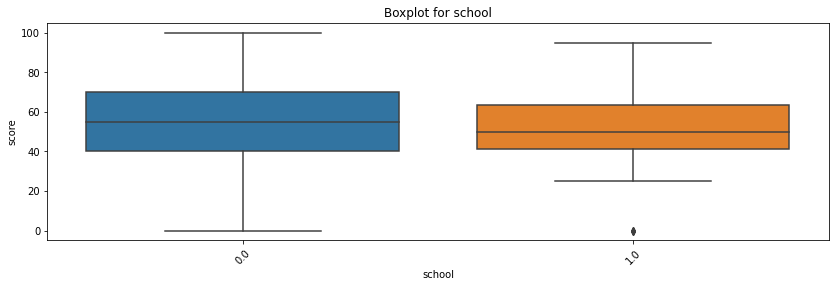

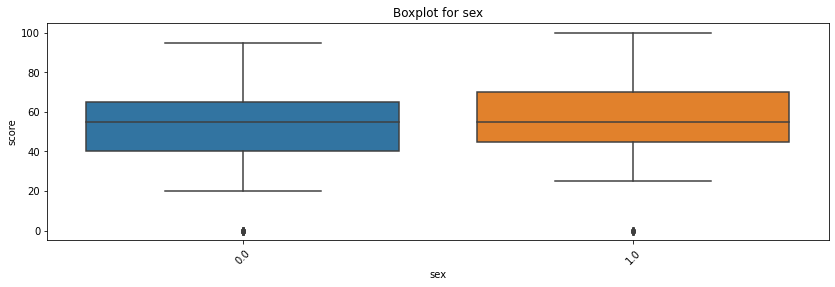

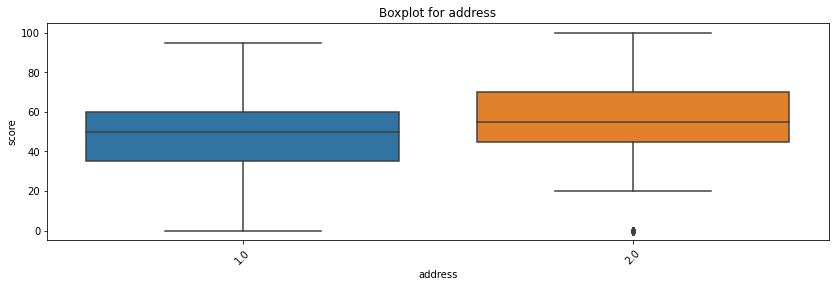

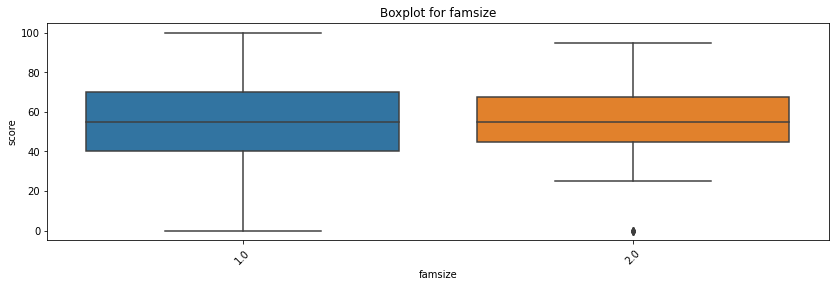

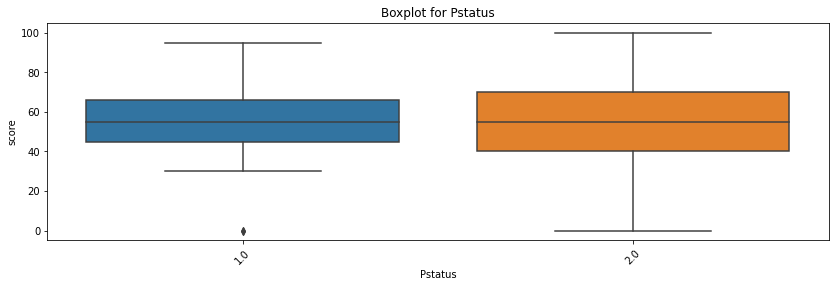

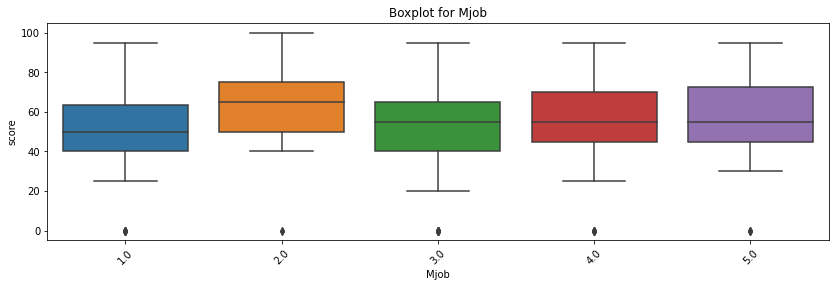

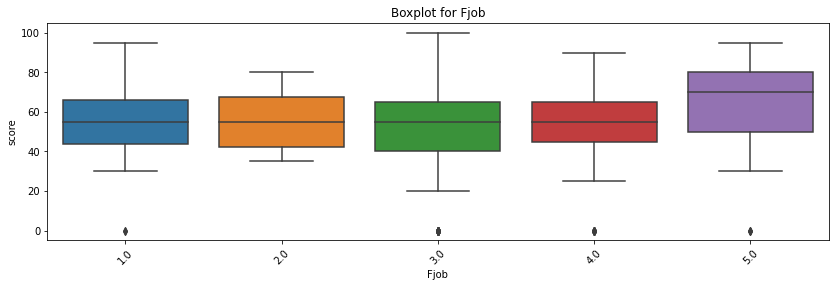

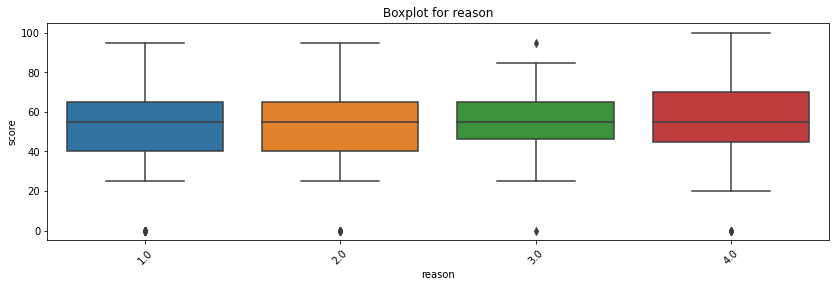

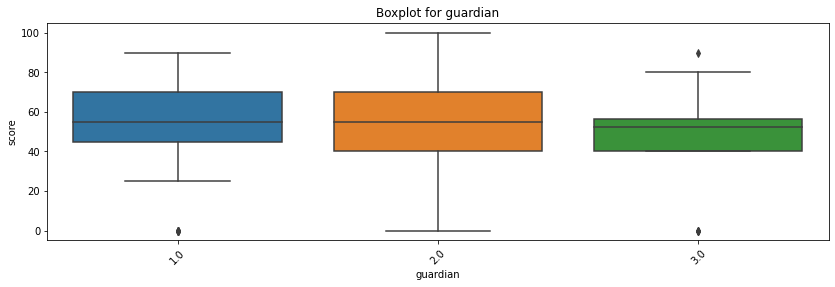

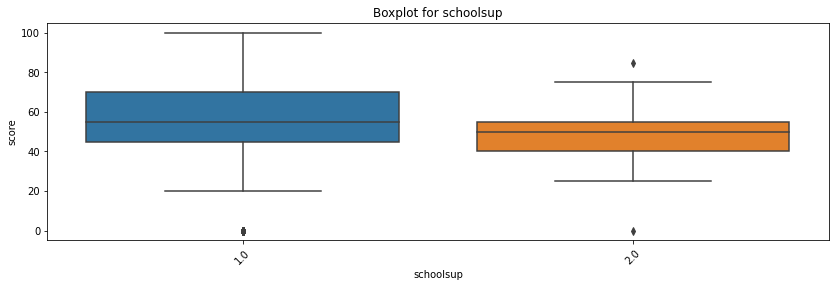

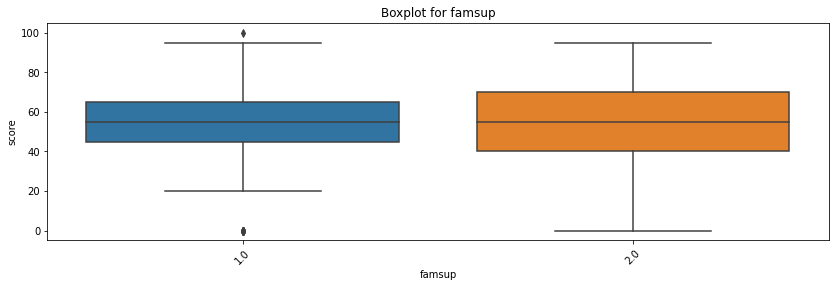

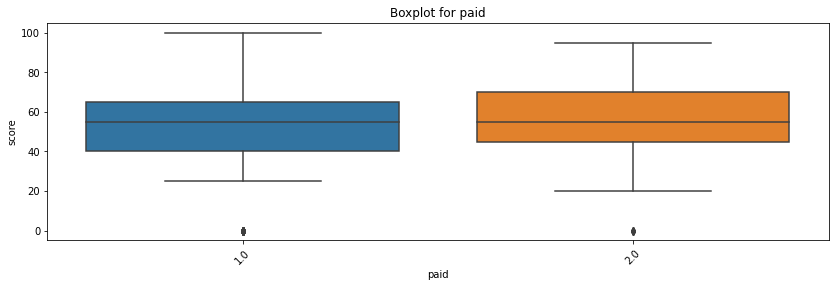

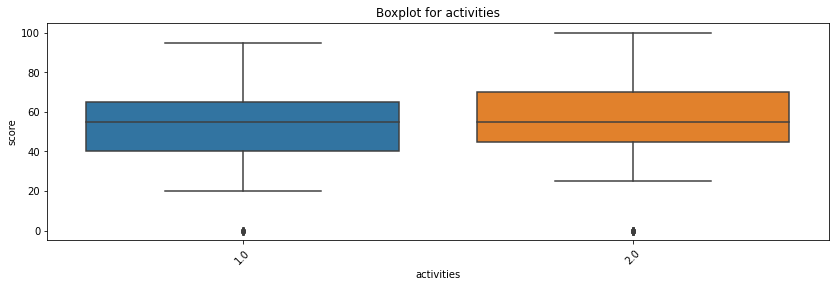

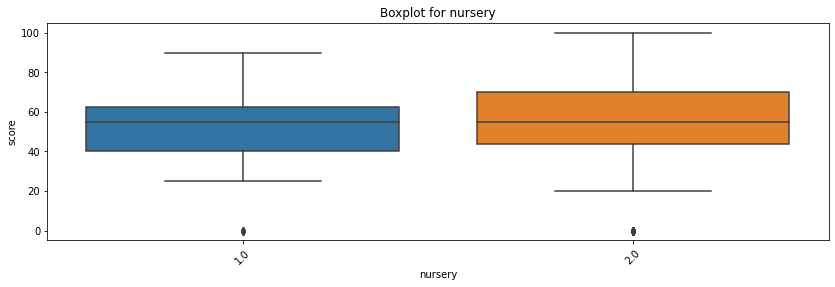

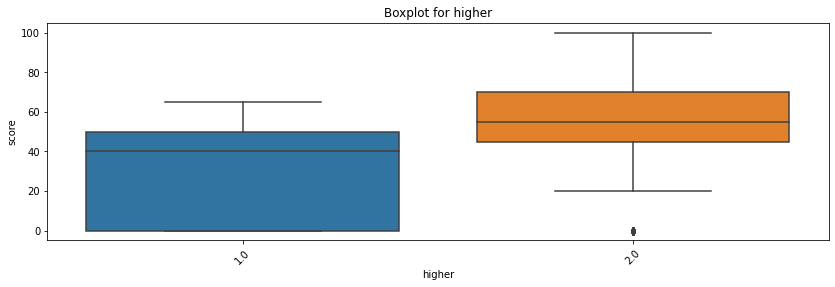

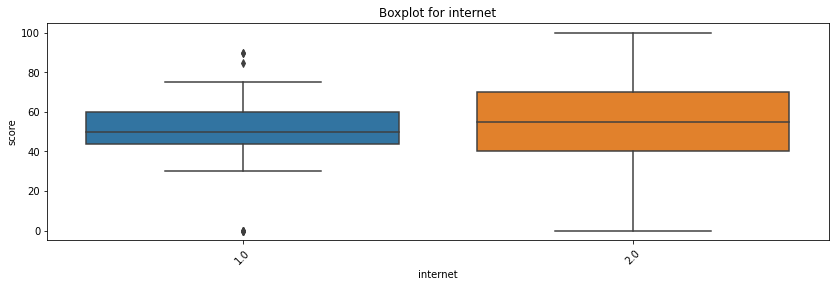

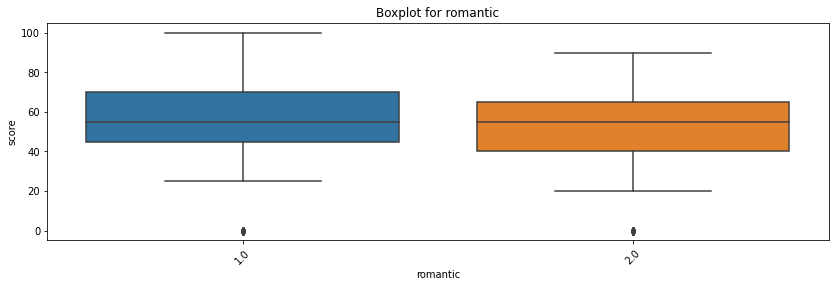

In [201]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
# В силу того, что по большинству категорий разброс номинативных данных не очень велик, 
# возможный интерес представляют данные об образовании отца и матери, но так же и показатель higher

In [203]:
# Используя тест Стьюдента попробуем найти пармаетры, влияющие на итоговую оценку студентов по математике 

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [ ]:
# В итоге имеет смысл оставить для модели показатели: 
# freetime, famrel, traveltime, health, absences, address, Mjob, higher, romantic 